<h1> title: "Proyecto Integrador" </h1>
<strong>  author: "Julián Castelblanco Benítez"</strong>

Cargamos las librerías

In [1]:
import re
import matplotlib.pyplot as plt
import nltk #libreria de procesamiento natural del lenguaje 
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer # autor diferente para Stemmer
from nltk.stem import WordNetLemmatizer


Lectura de la base de datos

In [2]:
list_of_files = glob.glob('/home/jcastelblb/Proyecto_Integrador/datasets/papers-txt/*.txt')           # create the list of file
texto=""
for file_name in list_of_files:
  #print(file_name)
  input_file = open(file_name,"r",encoding='iso-8859-1')
  texto = texto + input_file.read()
#print(len(list_of_files))
#print(text)

Selección de los datos que queremos (Únicamente letras)

In [3]:
texto= re.sub('[^A-z]+',' ',texto) #lo mismo de stringr
print(len(texto))

57979780


Tokenizar: crea un vector de todas las palabras de los textos.

In [4]:
tokens= texto.split() 
tokens=[w.lower() for w in tokens if (len(w)>1) and w.isalpha()] # pasar a minúscula seleccionar palabras>1 y que sean letras 
print(len(tokens))

8910161


Cargamos Stop Words y removemos las palabras que no agregan significado, artículos,etc.

In [5]:
sw=stopwords.words('english')
tokens=[w for w in tokens if w not in sw]
print(len(tokens))

5316522


Creamos el Stemmer (palabras que comparten una misma raíz)

In [6]:
stemmer= PorterStemmer() 
#stemmer2= LancasterStemmer() ## en qué consiste el lancasterS
tokens=[stemmer.stem(w) for w in tokens] ## Stemen 
print(len(tokens))

5316522


Lematizar (cambia palabras que signifiquen lo mismo en tiempo presente) ej. are is were was por be

In [7]:
wordnet_lemmatizer= WordNetLemmatizer()
tokens= [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens] #Selecciona los verbos 
print(len(tokens))

5316522


Frecuencia de las palabras y mostrar las 20 primeras

In [8]:
fdist1=nltk.FreqDist(tokens)
print("tokens= ", len(tokens))
print("len voc= ",len(fdist1))
fdist2=fdist1.most_common(20)
print(fdist2)


tokens=  5316522
len voc=  74426
[('use', 39438), ('set', 34352), ('algorithm', 28815), ('comput', 26313), ('let', 25708), ('follow', 25645), ('time', 24958), ('one', 24884), ('number', 21214), ('function', 20963), ('give', 20706), ('case', 20526), ('two', 20331), ('show', 19633), ('problem', 19159), ('model', 19080), ('result', 19020), ('theorem', 18979), ('graph', 18816), ('gener', 18019)]


grafico de barras para las 20 primeas

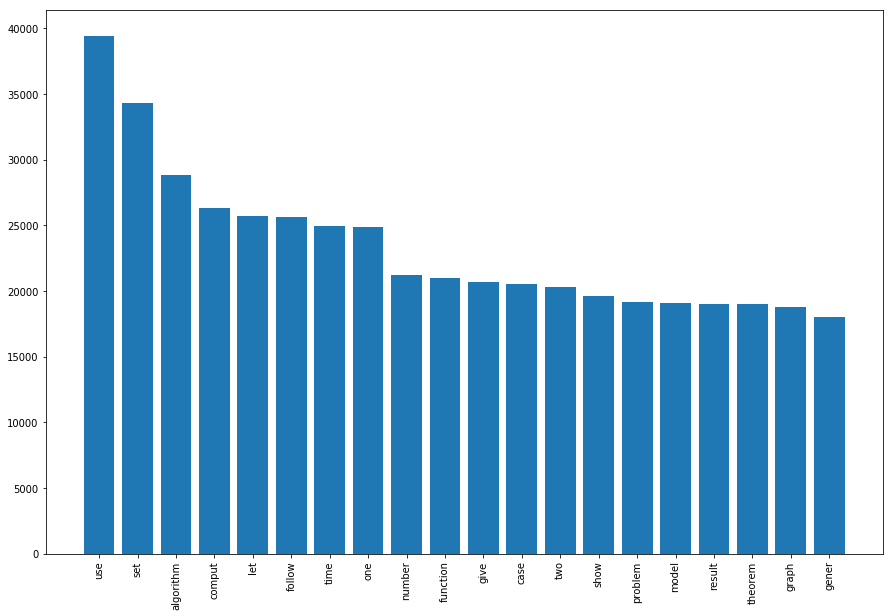

In [9]:
x,y=zip(*fdist2)# crea el vector xy en donde busca cada uno y pone las recurrencias de cada una
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90) # rotar los rótulos del eje x
plt.show()